In [1]:
#Libraries
from selenium import webdriver
import requests
import bs4
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np

#URL
url1 = 'https://стопкоронавирус.рф/information/'
url2 = 'http://www.statdata.ru/largest_regions_russia'
url3 = 'http://www.statdata.ru/ploshchad/rossii'

#Население и площадь
popul = pd.read_html(url2, match='Население на 1 января 2020 года')
sq = pd.read_html(url3, match='Субъект')

# Selenium
browser = webdriver.Chrome(executable_path=r"C:\Program Files\chromedriver_win32\chromedriver.exe")
browser.get(url1)
corona_tab = browser.find_elements_by_xpath('//table/tbody')
 
# Пустые листы для сбора инфо
reg_name,total_item,new_item = [],[],[]
 
# Перебор по строкам и столбцам
for table in corona_tab:
    for row in table.find_elements_by_xpath(".//tr"):
        reg_name.append(row.find_element_by_xpath('./th').get_attribute('textContent'))
        total_item.append(row.find_element_by_xpath('./td[@class="col-sick"]').get_attribute('textContent'))
        new_item.append(row.find_element_by_xpath('./td[@class="col-new"]').get_attribute('textContent'))
# Все складываем в Dataframe    
df = pd.DataFrame({"Region":reg_name,"All_cases":total_item,"New_cases":new_item})

#чистим лишнее и приводим в порядок в df
df['Region'] = df['Region'].str.replace('\n', '')
df['Region'] = df['Region'].str.lstrip()
df['Region'] = df['Region'].str.rstrip()
df['New_cases'] = df['New_cases'].str.replace('\n', '')
df['All_cases'] = df['All_cases'].str.replace('\n', '')


#Убираем лишнее, переименовываем колонки, удаляем лишние
new_pop = popul[2][1:]
new_pop.columns = ['Region','Population','City','Selo','Population_19','City_19','Selo_19']
del new_pop['City'], new_pop['Selo'], new_pop['Population_19'], new_pop['City_19'], new_pop['Selo_19']

new_sq = sq[1][1:]
new_sq.columns = ['№','Region','Square','%','Okrug']
del new_sq['№'], new_sq['%'], new_sq['Okrug']

In [2]:
new_pop['Region'][3:20] #удалить потом

4     Белгородская область
5         Брянская область
6     Владимирская область
7      Воронежская область
8       Ивановская область
9        Калужская область
10     Костромская область
11         Курская область
12        Липецкая область
13      Московская область
14       Орловская область
15       Рязанская область
16      Смоленская область
17      Тамбовская область
18        Тверская область
19        Тульская область
20     Ярославская область
Name: Region, dtype: object

In [4]:
new_sq['Region'][25] #удалить потом

'Алтайский край'

In [5]:
df['Region'][60:90] #удалить потом

60                      Псковская область
61                     Республика Хакасия
62                    Вологодская область
63                    Республика Калмыкия
64                   Новгородская область
65                    Костромская область
66                Калининградская область
67                       Амурская область
68                    Сахалинская область
69                       Республика Алтай
70                       Липецкая область
71                    Республика Мордовия
72                   Республика Татарстан
73                   Республика Ингушетия
74    Республика Северная Осетия — Алания
75                     Курганская область
76                      Республика Адыгея
77                        Камчатский край
78                    Республика Марий Эл
79                    Магаданская область
80                            Севастополь
81                   Чеченская Республика
82           Еврейская автономная область
83              Ненецкий автономны

In [7]:
new_sq['Region'][10] = 'Архангельская область'

In [8]:
new_sq['Region'][5] = 'Тюменская область'

In [9]:
new_sq['Region'][11] = 'Ханты-Мансийский АО'

In [10]:
new_pop['Region'][71] = 'Ханты-Мансийский АО'

In [11]:
new_pop['Region'][21] = 'Москва'

In [12]:
new_pop['Region'][34] = 'Санкт-Петербург'

In [13]:
new_sq['Region'][25] = 'Республика Алтай'

In [14]:
new_pop['Region'][76] = 'Республика Алтай'

In [15]:
new_sq['Region'][18] = 'Республика Бурятия'

In [16]:
new_sq['Region'][83] = 'Кабардино-Балкарская Республика'

In [17]:
new_pop['Region'][47] = 'Кабардино-Балкарская Республика'

In [18]:
new_sq['Region'][79] = 'Республика Чувашия'

In [19]:
new_pop['Region'][58] = 'Республика Чувашия'

In [20]:
new_sq['Region'][82] = 'Карачаево-Черкесская Республика'

In [21]:
new_pop['Region'][48] = 'Карачаево-Черкесская Республика'

In [22]:
new_sq['Region'][84] = 'Республика Северная Осетия — Алания'

In [23]:
new_pop['Region'][49] = 'Республика Северная Осетия — Алания'

In [24]:
new_pop['Region'][43] = 'Севастополь'

In [25]:
new_sq['Region'][64] = 'Еврейская автономная область'

In [26]:
new_pop['Region'][96] = 'Еврейская автономная область'

In [27]:
sq_pop = new_pop.merge(new_sq, on = 'Region', how = 'inner')[1:]

In [28]:
sq_pop = sq_pop.sort_values(by=['Region'])

In [33]:
sq_pop[60:90]

,Region,Population,Square
68,Республика Хакасия,534 262,61 569
51,Республика Чувашия,1 217 818,18 343
37,Ростовская область,4 197 821,100 967
12,Рязанская область,1 108 847,39 605
57,Самарская область,3 179 532,53 565
30,Санкт-Петербург,5 398 064,1 403
58,Саратовская область,2 421 895,101 240
83,Сахалинская область,488 257,87 101
61,Свердловская область,4 310 681,194 307
38,Севастополь,449 138,864


In [34]:
sq_pop ['Population'] = sq_pop['Population'].str.replace(' ', '')
sq_pop[["Population"]] = sq_pop[["Population"]].apply(pd.to_numeric)
sq_pop ['Square'] = sq_pop['Square'].str.replace(' ', '')
sq_pop[['Square']] = sq_pop[['Square']].apply(pd.to_numeric)

In [35]:
#создаем колонку плотность, заполняем ее значениями
sq_pop['Density'] = ''
sq_pop['Density'] = sq_pop['Population'] / sq_pop['Square']

In [36]:
sq_pop['Density']

81     2.182997
23     2.644435
21     1.926615
35    20.516115
1     57.092614
        ...    
63     3.131400
64    39.155181
44    94.505400
85     0.069701
17    34.646018
Name: Density, Length: 85, dtype: float64

In [37]:
all_in = df.merge(sq_pop, on = 'Region', how = 'outer')

In [84]:
all_in = all_in.sort_values(by=['Density'])

In [85]:
all_in.dropna()

,Region,All_cases,New_cases,Population,Square,Density,%_of_sick,perc_of_sick,prob_to_sick
85,Чукотский автономный округ,386,10.0,50288.0,721481.0,0.069701,0.000199,0.007676,0.000199
84,Ненецкий автономный округ,647,2.0,44111.0,176810.0,0.249482,0.000045,0.014668,0.000045
80,Магаданская область,5595,44.0,140149.0,462464.0,0.303048,0.000314,0.039922,0.000314
30,Республика Саха (Якутия),19623,215.0,971996.0,3083523.0,0.315223,0.000221,0.020188,0.000221
78,Камчатский край,7492,76.0,313016.0,464275.0,0.674204,0.000243,0.023935,0.000243
...,...,...,...,...,...,...,...,...,...
74,Республика Ингушетия,9317,79.0,507061.0,3628.0,139.763230,0.000156,0.018375,0.000156
2,Московская область,108893,1065.0,7690863.0,44329.0,173.495071,0.000138,0.014159,0.000138
81,Севастополь,4218,62.0,449138.0,864.0,519.835648,0.000138,0.009391,0.000138
1,Санкт-Петербург,118515,3695.0,5398064.0,1403.0,3847.515324,0.000685,0.021955,0.000685


In [134]:
all_in['perc_of_sick'] = ''
all_in[['All_cases']] = all_in[['All_cases']].apply(pd.to_numeric)
all_in['perc_of_sick'] = (all_in['All_cases'] / all_in['Population'])*100

In [168]:
all_in = all_in.sort_values(by=['perc_of_sick'],ascending= False)

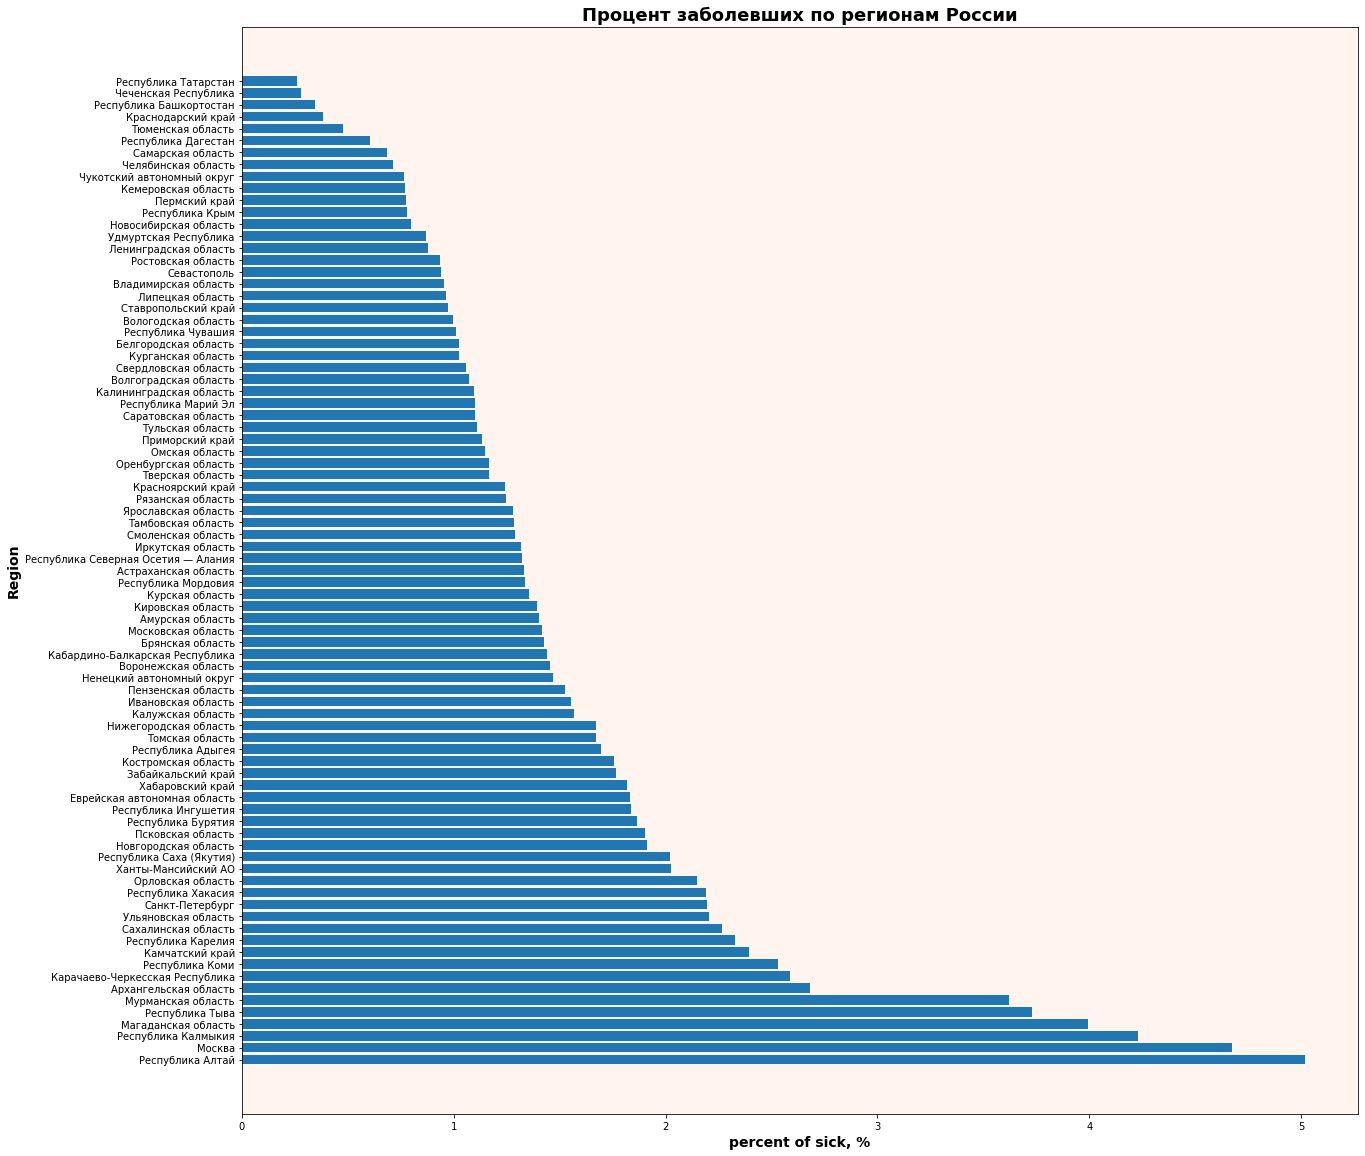

In [169]:
x = all_in['Region']
y = all_in['perc_of_sick']



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))

ax.barh(x, y)
ax.set_facecolor('seashell')

plt.xlabel('percent of sick, %', fontsize = 14, fontweight = 'bold')
plt.ylabel('Region', fontsize = 14, fontweight = 'bold')

fig.set_figwidth(20)   
fig.set_figheight(20)  
plt.title('Процент заболевших по регионам России', fontsize = 18, fontweight = 'bold')

plt.show()

In [137]:
all_in['prob_to_sick'] = ''

all_in['prob_to_sick'] = (all_in['New_cases'] / all_in['Population'])*100

In [175]:
all_in = all_in.sort_values(by = ['prob_to_sick'], ascending = False)

In [176]:
all_in

,Region,All_cases,New_cases,Population,Square,Density,%_of_sick,perc_of_sick,prob_to_sick
1,Санкт-Петербург,118515,3695.0,5398064.0,1403.0,3847.515324,0.000685,2.195509,0.068450
48,Республика Карелия,14285,399.0,614064.0,180520.0,3.401640,0.000650,2.326305,0.064977
69,Республика Алтай,11045,139.0,220181.0,92903.0,2.370010,0.000631,5.016327,0.063130
70,Республика Алтай,11045,139.0,220181.0,167996.0,1.310632,0.000631,5.016327,0.063130
0,Москва,592415,7320.0,12678079.0,2561.0,4950.440843,0.000577,4.672751,0.057737
...,...,...,...,...,...,...,...,...,...
35,Тюменская область,17945,165.0,3756536.0,1464173.0,2.565637,0.000044,0.477701,0.004392
31,Республика Дагестан,18757,106.0,3110858.0,50270.0,61.882992,0.000034,0.602953,0.003407
49,Республика Башкортостан,13987,135.0,4038151.0,142947.0,28.249288,0.000033,0.346371,0.003343
24,Краснодарский край,21751,178.0,5675462.0,75485.0,75.186620,0.000031,0.383246,0.003136


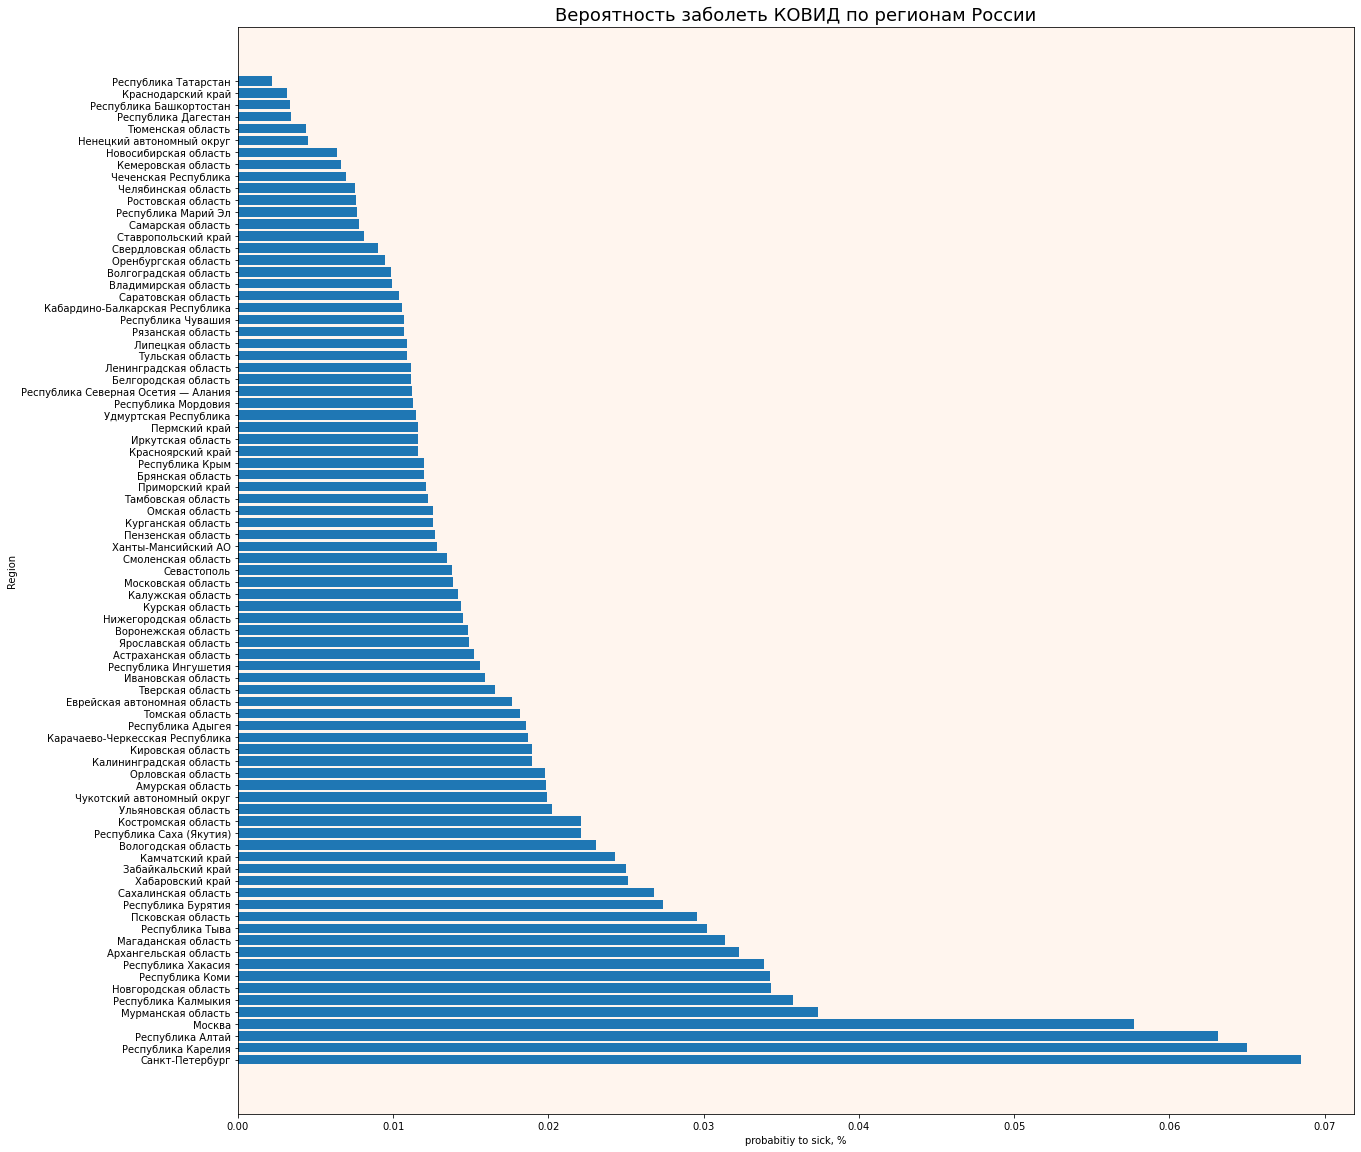

In [177]:
x = all_in['Region']
y = all_in['prob_to_sick']


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

ax.barh(x, y)
ax.set_facecolor('seashell')

plt.xlabel('probabitiy to sick, %')
plt.ylabel('Region')

fig.set_figwidth(20)   
fig.set_figheight(20) 

plt.title('Вероятность заболеть КОВИД по регионам России', fontsize = 18)


plt.show()

In [200]:
all_in = all_in.sort_values(by = ['prob_to_sick'], ascending = True)

In [209]:
Safe_Region = all_in.iloc[0]['Region']

In [210]:
Min_prob = all_in.iloc[0]['prob_to_sick']

In [211]:
print('Самый безопасный регион: ', Safe_Region, 'Вероятность заболевания: ', Min_prob,'%')

Самый безопасный регион:  Республика Татарстан Вероятность заболевания:  0.0021778744355461905 %
